#### Bhekie Danisa: 201633631

In [25]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#### Generating Datasets

In [26]:
np.random.seed(123)
x = np.random.uniform(0, 300, 200)
x = x[np.argsort(x)]
y = 5 + x**1 + x**2 + x**3
y_obs = y + np.random.normal(0, 900000, 200)

#### Creating a function that takes inputs x and returns a design matrix of a 6th-degree polynomial.

In [27]:
def design_matrix(x):
    n = len(x)
    return np.c_[np.ones(n), x, x**2, x**3, x**4, x**5, x**6]

In [28]:
λ = 10
I = np.eye(7)
I[0,0] = 0

#### Creating a function that takes a design matrix, lambda, and target variable as inputs to perform L2 regularised least squares regression to return the parameter estimates. 

In [29]:
def ridge_L2(x, y_obs, λ):
    X = design_matrix(x)
    θ = np.linalg.inv(X.T.dot(X) + λ*I).dot(X.T).dot(y_obs)
    return θ

#### Splitting data in to training and test data

In [30]:
X_train = x[x < 200]
X_test = x[x >= 200] 

In [31]:
y_train = y_obs[x < 200]
y_test = y_obs[x >= 200]

#### Cross-validation

In [32]:
λ = [0, 0.5, 10, 20, 30, 80, 100, 200]    

In [34]:
mse_train = []
for i in range(len(λ)):
    θ_train = ridge_L2(X_train, y_train, λ[i])
    X = design_matrix(X_train)
    y_pred = X.dot(θ_train)
    d = y_train - y_pred
    mse_i = 1/len(X_train)*(d).dot(d)
    mse_train.append(mse_i)

In [35]:
mse_test = []
for i in range(len(λ)):
    θ_test = ridge_L2(X_test, y_test, λ[i])
    X_t = design_matrix(X_test)
    y_pred = X_t.dot(θ_test)
    d = y_test - y_pred
    mse_j = 1/len(X_test)*(d).dot(d)
    mse_test.append(mse_j)

In [42]:
maximums = np.maximum( mse_train, mse_test)

In [45]:
min_max = min(maximums)

In [48]:
train = np.r_[mse_train]
test = np.r_[mse_test]
maxi = np.r_[maximums]
mini = np.r_[np.nan, min_max, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
print(pd.DataFrame(np.c_[train, test, maxi, mini],columns=['MSE train ', ' MSE test', 'Maximums', 'Min_Max'],
      index=['λ=0 ', 'λ=0.5', 'λ=10', 'λ=20', 'λ=30', 'λ=80', 'λ=100', 'λ=200']))

         MSE train       MSE test      Maximums       Min_Max
λ=0    7.239318e+11  1.025179e+12  1.025179e+12           NaN
λ=0.5  7.239318e+11  6.558407e+11  7.239318e+11  7.239318e+11
λ=10   7.239335e+11  6.770095e+11  7.239335e+11           NaN
λ=20   7.239378e+11  6.855554e+11  7.239378e+11           NaN
λ=30   7.239437e+11  6.895585e+11  7.239437e+11           NaN
λ=80   7.239803e+11  6.957903e+11  7.239803e+11           NaN
λ=100  7.239947e+11  6.966510e+11  7.239947e+11           NaN
λ=200  7.240530e+11  6.984570e+11  7.240530e+11           NaN


#### The min-max value ontained above is the MSE value from train set corresponding to λ[1] which is 0.5

#### Plotting lambda against the MSE for train and test dataset and discuss the results. 

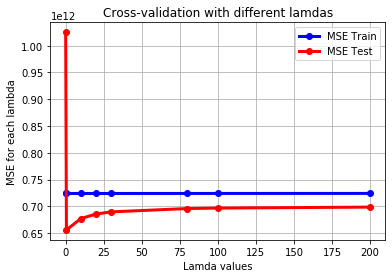

In [40]:
plt.plot(λ, mse_train, 'bo-', label='MSE Train', color="blue", linewidth=3)
plt.plot(λ, mse_test, 'bo-', label='MSE Test ', color="red", linewidth=3)
plt.xlabel('Lamda values'); plt.ylabel('MSE for each lambda')
plt.title('Cross-validation with different lamdas')
plt.legend()
plt.grid()